In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
from datetime import datetime
import re
from twython import Twython
from twython import TwythonStreamer
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import string
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sbuciuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
APP_KEY = "LUpqT9BUMzTzdDFVYMls5myJe"
APP_SECRET = "EP31NVKfAg1kWnE3CA0FRRARJMX07irWX9VQUNyUU2pnFPlBeg"
twitter = Twython(APP_KEY, APP_SECRET)

In [3]:
for i in range(0, 17):
    user_timeline = twitter.get_user_timeline(screen_name="HillaryClinton",count=1000, include_rts=False)

In [4]:
#lis=user_timeline[0]['id']-1 #tweet id # for most recent tweet
#only query as deep as necessary
#tweetsum= user_timeline[0]['user']['statuses_count']
#cycles=ceil(tweetsum / 200)
#if cycles>16:
    #cycles=16 #API only allows depth of 3200 so no point trying deeper than 200*16
#time.sleep(60)
#for i in range(0, cycles): ## iterate through all tweets up to max of 3200
    #incremental = twitter.get_user_timeline(screen_name=handle,
    #count=200, include_retweets=True, max_id=lis)
    #user_timeline.extend(incremental)
    #lis=user_timeline[-1]['id']-1
    #time.sleep(90) ## 90 second rest between api calls. The API allows 15 calls per 15 minutes so this is conservative


In [5]:
for i, val in enumerate(user_timeline):
    user_timeline[i]['user_screen_name']=user_timeline[i]['user']['screen_name']
    user_timeline[i]['user_followers_count']=user_timeline[i]['user']['followers_count']
    user_timeline[i]['user_id']=user_timeline[i]['user']['id']
    user_timeline[i]['user_created_at']=user_timeline[i]['user']['created_at']
    if 'retweeted_status' in user_timeline[i].keys():
        user_timeline[i]['rt_count'] = user_timeline[i]['retweeted_status']['retweet_count']
        user_timeline[i]['qt_id'] = user_timeline[i]['retweeted_status']['id']
        user_timeline[i]['rt_created'] = user_timeline[i]['retweeted_status']['created_at']
        user_timeline[i]['rt_user_screenname'] = user_timeline[i]['retweeted_status']['user']['name']
        user_timeline[i]['rt_user_id'] = user_timeline[i]['retweeted_status']['user']['id']
        user_timeline[i]['rt_user_followers'] = user_timeline[i]['retweeted_status']['user']['followers_count']
        del user_timeline[i]['retweeted_status']
    if 'quoted_status' in user_timeline[i].keys():
        user_timeline[i]['qt_created'] = user_timeline[i]['quoted_status']['created_at']
        user_timeline[i]['qt_id'] = user_timeline[i]['quoted_status']['id']
        user_timeline[i]['qt_text'] = user_timeline[i]['quoted_status']['text']
        user_timeline[i]['qt_user_screenname'] = user_timeline[i]['quoted_status']['user']['name']
        user_timeline[i]['qt_user_id'] = user_timeline[i]['quoted_status']['user']['id']
        user_timeline[i]['qt_user_followers'] = user_timeline[i]['quoted_status']['user']['followers_count']
        del user_timeline[i]['quoted_status']
    if user_timeline[i]['entities']['urls']: #list
        for j, val in enumerate(user_timeline[i]['entities']['urls']):
            urlj='url_'+str(j)
            user_timeline[i][urlj]=user_timeline[i]['entities']['urls'][j]['expanded_url']
    if user_timeline[i]['entities']['user_mentions']: #list
        for j, val in enumerate(user_timeline[i]['entities']['user_mentions']):
            mentionj='mention_'+str(j)
            user_timeline[i][mentionj] = user_timeline[i]['entities']['user_mentions'][j]['screen_name']
    if user_timeline[i]['entities']['hashtags']: #list
        for j, val in enumerate(user_timeline[i]['entities']['hashtags']):
            hashtagj='hashtag_'+str(j)
            user_timeline[i][hashtagj] = user_timeline[i]['entities']['hashtags'][j]['text']
    if user_timeline[i]['coordinates'] is not None:  #NoneType or Dict
        user_timeline[i]['coord_long'] = user_timeline[i]['coordinates']['coordinates'][0]
        user_timeline[i]['coord_lat'] = user_timeline[i]['coordinates']['coordinates'][1]
    del user_timeline[i]['coordinates']
    del user_timeline[i]['user']
    del user_timeline[i]['entities']
    if 'place' in user_timeline[i].keys():  #NoneType or Dict
        del user_timeline[i]['place']
    if 'extended_entities' in user_timeline[i].keys():
        del user_timeline[i]['extended_entities']
    if 'geo' in user_timeline[i].keys():
        del user_timeline[i]['geo']

In [10]:
today = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(today)

2016-09-24 21:57:38


In [11]:
HillaryClintondf = pd.DataFrame(user_timeline)
#print(dftrump) original dataframe 

In [12]:
today = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(today)
#dfHillaryClinton['test'] = pd.Series([today for x in range(len(dftrump.index))], index=dftrump.index)

2016-09-24 21:57:39


In [13]:
#initial creation of dataframe
#trumpdf = pd.DataFrame(user_timeline)
#convert created date in datetime format
HillaryClintondf['created_at'] = pd.to_datetime(HillaryClintondf['created_at'])

In [14]:
HillaryClintondf.head()

,contributors,created_at,favorite_count,favorited,hashtag_0,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,retweeted,source,text,truncated,url_0,url_1,user_created_at,user_followers_count,user_id,user_screen_name
0,None,2016-09-24 23:49:22,4602,False,NaN,779830115643617280,779830115643617280,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...",The new @NMAAHC is an overdue tribute to Afric...,False,NaN,NaN,Tue Apr 09 18:04:35 +0000 2013,8951480,1339835893,HillaryClinton
1,None,2016-09-24 22:58:12,3031,False,NaN,779817238346002432,779817238346002432,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""Our choice, Hillary Clinton, has a record of ...",True,https://twitter.com/i/web/status/7798172383460...,NaN,Tue Apr 09 18:04:35 +0000 2013,8951480,1339835893,HillaryClinton
2,None,2016-09-24 21:55:59,5303,False,NaN,779801578723217408,779801578723217408,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""I thought, this woman—I want to ride with her...",False,NaN,NaN,Tue Apr 09 18:04:35 +0000 2013,8951480,1339835893,HillaryClinton
3,None,2016-09-24 21:05:47,4882,False,NaN,779788945953591296,779788945953591296,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...",Hillary's been fighting for women and girls he...,False,http://hrc.io/2d9vSky,NaN,Tue Apr 09 18:04:35 +0000 2013,8951480,1339835893,HillaryClinton
4,None,2016-09-24 19:41:25,5632,False,NaN,779767715040989184,779767715040989184,None,NaN,None,...,False,"<a href=""https://about.twitter.com/products/tw...","""A lifetime’s commitment to solving problems i...",False,http://nyti.ms/2cVyJ2o,NaN,Tue Apr 09 18:04:35 +0000 2013,8951480,1339835893,HillaryClinton


In [15]:
list(HillaryClintondf.columns.values)

['contributors',
 'created_at',
 'favorite_count',
 'favorited',
 'hashtag_0',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'mention_0',
 'possibly_sensitive',
 'qt_created',
 'qt_id',
 'qt_text',
 'qt_user_followers',
 'qt_user_id',
 'qt_user_screenname',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'source',
 'text',
 'truncated',
 'url_0',
 'url_1',
 'user_created_at',
 'user_followers_count',
 'user_id',
 'user_screen_name']

In [16]:
#get structure of dataframe: row & col

HillaryClintondf.shape

(166, 35)

In [17]:
for i in range(0, 7):
    temp_timeline = twitter.get_user_timeline(screen_name="HillaryClinton",count=1000, include_rts=False)

In [18]:
for i, val in enumerate(temp_timeline):
    temp_timeline[i]['current_time'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    temp_timeline[i]['user_screen_name']=temp_timeline[i]['user']['screen_name']
    temp_timeline[i]['user_followers_count']=temp_timeline[i]['user']['followers_count']
    if 'retweeted_status' in temp_timeline[i].keys():
        temp_timeline[i]['rt_count'] = temp_timeline[i]['retweeted_status']['retweet_count']
        temp_timeline[i]['rt_created'] = temp_timeline[i]['retweeted_status']['created_at']
        temp_timeline[i]['rt_user_id'] = temp_timeline[i]['retweeted_status']['user']['id']
        temp_timeline[i]['rt_user_followers'] = temp_timeline[i]['retweeted_status']['user']['followers_count']
        del temp_timeline[i]['retweeted_status']     

In [19]:
df3 = pd.DataFrame(temp_timeline)
df3['created_at'] = pd.to_datetime(df3['created_at'])

In [20]:
df3.shape

(166, 31)

In [21]:
df3.head()

,contributors,coordinates,created_at,current_time,entities,extended_entities,favorite_count,favorited,geo,id,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,truncated,user,user_followers_count,user_screen_name
0,None,None,2016-09-24 23:49:22,2016-09-24 21:57:53,"{'hashtags': [], 'user_mentions': [{'name': 'S...",NaN,4647,False,None,779830115643617280,...,NaN,NaN,1398,False,"<a href=""https://about.twitter.com/products/tw...",The new @NMAAHC is an overdue tribute to Afric...,False,"{'is_translator': False, 'profile_background_i...",8951497,HillaryClinton
1,None,None,2016-09-24 22:58:12,2016-09-24 21:57:53,"{'hashtags': [], 'user_mentions': [{'name': 'T...",NaN,3049,False,None,779817238346002432,...,NaN,NaN,1160,False,"<a href=""https://about.twitter.com/products/tw...","""Our choice, Hillary Clinton, has a record of ...",True,"{'is_translator': False, 'profile_background_i...",8951497,HillaryClinton
2,None,None,2016-09-24 21:55:59,2016-09-24 21:57:53,{'media': [{'source_status_id': 77936203983988...,{'media': [{'source_status_id': 77936203983988...,5322,False,None,779801578723217408,...,NaN,NaN,2238,False,"<a href=""https://about.twitter.com/products/tw...","""I thought, this woman—I want to ride with her...",False,"{'is_translator': False, 'profile_background_i...",8951497,HillaryClinton
3,None,None,2016-09-24 21:05:47,2016-09-24 21:57:53,"{'hashtags': [], 'user_mentions': [], 'symbols...",NaN,4893,False,None,779788945953591296,...,NaN,NaN,1952,False,"<a href=""https://about.twitter.com/products/tw...",Hillary's been fighting for women and girls he...,False,"{'is_translator': False, 'profile_background_i...",8951497,HillaryClinton
4,None,None,2016-09-24 19:41:25,2016-09-24 21:57:53,"{'hashtags': [], 'user_mentions': [{'name': 'T...",NaN,5646,False,None,779767715040989184,...,NaN,NaN,2409,False,"<a href=""https://about.twitter.com/products/tw...","""A lifetime’s commitment to solving problems i...",False,"{'is_translator': False, 'profile_background_i...",8951497,HillaryClinton


In [22]:
list(df3.columns.values)

['contributors',
 'coordinates',
 'created_at',
 'current_time',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'source',
 'text',
 'truncated',
 'user',
 'user_followers_count',
 'user_screen_name']

In [24]:
#create create dataframe with the required fields for analysis.
#trumpdf is the primary/original tweeter request, we create the df1
df1 = HillaryClintondf[['created_at','favorite_count','id', 'lang', 'retweet_count', 'user_followers_count','user_screen_name', 'text']]

In [25]:
df1.shape

(166, 8)

In [26]:
#get the index/column list 
list(df1.columns.values)

['created_at',
 'favorite_count',
 'id',
 'lang',
 'retweet_count',
 'user_followers_count',
 'user_screen_name',
 'text']

In [27]:
#create second dataframe witht he required fields for join and create the realDonaldTrump, here is the df3 
#so we create df2

df2 = df3[['current_time','favorite_count','id', 'retweet_count', 'user_followers_count','user_screen_name']]

In [28]:
list(df2.columns.values)

['current_time',
 'favorite_count',
 'id',
 'retweet_count',
 'user_followers_count',
 'user_screen_name']

In [29]:
df2.shape

(166, 6)

In [30]:
realHillaryClinton = pd.merge(df1, df2, how='inner', on=['id', 'user_screen_name'], left_index=True, sort=True, copy=True, )

In [32]:
#create final dataframe with required fields for analysis. using inner join in order to find the one already in the dataframe.
#realHillaryClinton = pd.merge(df1, df2, how='inner', on=['key1', 'key2'])

In [33]:
realHillaryClinton.head()

,created_at,favorite_count_x,id,lang,retweet_count_x,user_followers_count_x,user_screen_name,text,current_time,favorite_count_y,retweet_count_y,user_followers_count_y
165,2016-09-16 13:58:03,1920,776782199832113152,en,991,8951480,HillaryClinton,"""We know who Donald is. For five years, he has...",2016-09-24 21:57:53,1920,991,8951497
164,2016-09-16 13:58:45,1890,776782378375208960,en,630,8951480,HillaryClinton,"Just yesterday, Trump again refused to say wit...",2016-09-24 21:57:53,1890,630,8951497
163,2016-09-16 13:59:10,2812,776782482352009216,en,1390,8951480,HillaryClinton,"Barack Obama was born in America, plain and si...",2016-09-24 21:57:53,2812,1390,8951497
162,2016-09-16 14:00:39,2383,776782857993916416,en,1213,8951480,HillaryClinton,Donald Trump is unfit to be president.\nWe jus...,2016-09-24 21:57:53,2383,1213,8951497
161,2016-09-16 14:01:46,1700,776783135447089152,en,840,8951480,HillaryClinton,"""Donald Trump looks at a distinguished judge b...",2016-09-24 21:57:53,1700,840,8951497


In [34]:
#d = dict(screen_name = screen_name, Favorites = favorites_count, Retweets = retweets_count,Date = date, Text = text)

#HillaryClinton = pd.DataFrame({k : pd.Series(v) for k, v in  list(d.items())})
status_texts = realHillaryClinton[['text']]
print(status_texts)

                                                  text
165  "We know who Donald is. For five years, he has...
164  Just yesterday, Trump again refused to say wit...
163  Barack Obama was born in America, plain and si...
162  Donald Trump is unfit to be president.\nWe jus...
161  "Donald Trump looks at a distinguished judge b...
160  "He looks at a Gold Star family and sees them ...
159  Donald Trump looks at women and decides how th...
158  “Let’s reject the cynicism, the bullying, and ...
157  Let’s build a future where love trumps hate. h...
156                 What Trump just did is a disgrace.
155  Expressing zero regret for years of pushing a ...
154  Leading the birther movement is deplorable. At...
153  When Trump tries to deflect blame for denying ...
152  Again, Trump turns his faults on others. Psych...
151  This shouldn't have to be said: You don’t just...
150  Trump has spent years peddling a racist conspi...
149  The birther lie is what turned Trump from an o...
148  Trump

In [35]:
#count words in each tweet, we can also lower all the words/characters to by using .lower(),
words_HillaryClinton = pd.Series(' '.join(realHillaryClinton.text).split())
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

In [36]:

#implementation of stop words using nltk library for language processing
terms_stop = [term for term in words_HillaryClinton if term not in stop]

In [37]:
print(terms_stop)

['"We', 'know', 'Donald', 'is.', 'For', 'five', 'years,', 'led', 'birther', 'movement', 'de-legitimize', 'first', 'black', 'president.”', '—Hillary', 'Just', 'yesterday,', 'Trump', 'refused', 'say', 'words', 'president', 'born', 'United', 'States.', 'Barack', 'Obama', 'born', 'America,', 'plain', 'simple.', 'Donald', 'Trump', 'owes', 'American', 'people', 'apology.', 'Donald', 'Trump', 'unfit', 'president.', 'We', 'can’t', 'accept', 'this.', 'We’ve', 'got', 'stand', 'this.', 'If', 'don’t,', 'won’t', 'stop.', '"Donald', 'Trump', 'looks', 'distinguished', 'judge', 'born', 'Indiana,', 'sees', 'Mexican,', 'American.”', '—Hillary', '"He', 'looks', 'Gold', 'Star', 'family', 'sees', 'Muslims,', 'patriotic', 'Americans.”', '—Hillary', 'Trump', 'Donald', 'Trump', 'looks', 'women', 'decides', 'looks', 'rate', 'scale', 'one', '10.', '“Let’s', 'reject', 'cynicism,', 'bullying,', 'divisive', 'rhetoric', 'opponent', 'using', 'try', 'make', 'us', 'afraid', 'other.”', 'Let’s', 'build', 'future', 'love

In [38]:
word_counts = {}
for word in terms_stop:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

In [39]:
print(word_counts)

{'https://t.co/KHguTDbKW9': 1, 'Office': 1, 'girl."': 2, 'https://t.co/qa9qO4AFxW': 2, 'cleaner,': 1, '"Hillary': 3, 'States.': 1, 'https://t.co/2LRtZBls9A': 1, 'quit—no': 1, 'together.”': 1, 'r…': 1, '"projecting."': 1, 'https://t.co/QOqcWnw7OJ': 1, '"I\'m': 1, 'blown': 1, 'history.': 2, 'shot': 1, 'https://t.co/t1uxcoVJT5': 1, 'Meet': 1, 'bullies': 1, 'officers—but': 1, 'Have': 1, 'Billie': 1, 'trumps': 3, 'there:': 1, 'qualifies': 1, 'tax': 2, 'right.': 1, 'https://t.co/X3oqEoOYsU': 1, 'afford': 2, 'https://t.co/KzgPQgPjxK': 1, 'daughters': 1, 'jobs': 1, 'need': 5, 'thing': 1, 'Street—not': 1, 'president.”': 2, 'https://t.co/qaswl7IOOJ': 1, 'https://t.co/HeafYwy0Fp': 1, 'ballot': 1, 'respect.': 1, 'grid': 1, '“I’m': 2, 'inclusive': 3, 'Office.': 1, 'progress': 2, 'https://t.co/mYba5FCBrb': 1, 'backs': 2, 'TV': 2, 'pragmatic': 2, '8,': 1, 'A': 2, 'inclusive,': 1, 'time': 2, 'draw': 1, 'Prisoners': 1, 'failing.': 1, 'loose': 1, 'reform.': 1, 'like': 4, 'Lamont': 2, 'Building': 1, 'mis

In [60]:
#one more filtering with some custome specified stopwords what are not in nltk library
filterHillaryClinton = {k: v for k, v in word_counts.items() if v > 1}

print(filterHillaryClinton)

Stopwords = ['A','AND','An','And','As','Be','C','this','they',
'Can','D','Do','Don','For','Go','He','IS','Is','It','K','M', 'I',
'O','On','P','Q','R','S','So','T','THE','That','The','Their','There',
'They','This','U','we','you','words','w','ve','u','the','that','than',
'her','he','had','for','e','d','co','a','V','TV','was','to','so','she'
't','such','some','s','re','my','m','ll','is','it','of','as','at','am',
't', 'or','our','in','do','be','them','they','their','this','were','when',
'who','with','what','amp','an','and','are','000','your','she','him','his',
'get','but','would','https','on','have','will','all','has',
'just', 'now','out','about','from','by', 'the', 'v', 'b','—Hillary','&amp;', 'Hillary']

for k, v in list(filterHillaryClinton.items()):
    print(k, v)
    if k in Stopwords:
        del filterHillaryClinton[k]

{'insults.': 2, 'girl."': 2, 'https://t.co/qa9qO4AFxW': 2, 'disqualify': 2, 'best': 2, 'others.': 2, '-H': 4, 'time': 2, 'let': 2, "shouldn't": 2, 'himself.': 3, 'future.': 3, 'https://t.co/wDxspmxT9Q': 2, 'history.': 2, 'attacks': 2, 'say': 3, "It's": 3, 'knocked': 2, 'trumps': 3, '—@NYTimes': 2, 'tax': 2, 'fighting': 2, 'So': 2, 'afford': 2, 'registered': 2, 'student': 3, 'seen': 2, '"I': 7, 'need': 5, 'president.”': 2, 'disability.': 2, 'https://t.co/2LRtZB3Ri2': 2, '“I’m': 2, 'build': 6, 'back': 3, 'inclusive': 3, '"Hillary': 3, 'progress': 2, 'backs': 2, 'TV': 2, 'watch': 2, 'A': 2, 'president:': 2, 'believes': 2, 'kids': 3, 'can’t': 3, 'like': 4, 'economy': 4, 'help': 2, 'people': 10, 'got': 7, 'families': 2, 'matter': 2, 'led': 3, 'without': 4, 'take': 5, 'judge': 2, 'We’ve': 2, 'get': 10, 'would': 5, 'ever': 3, 'fix': 2, 'Obama': 2, 'candidate': 2, 'exactly': 3, 'I': 3, 'better': 4, 'And': 2, 'brave': 2, 'doesn’t': 3, "We've": 2, 'Tune': 2, 'years': 5, 'Between': 2, 'turning': 

In [61]:
toptwentyHillaryClinton = dict(Counter(filterHillaryClinton).most_common(20))
print(toptwentyHillaryClinton)


{'American': 7, 'president': 11, 'one': 6, 'make': 11, 'https://t.co/tTgeqxNqYm': 13, 'We': 24, '"I': 7, 'need': 5, 'Clinton': 6, 'women': 6, 'Donald': 26, '—@FLOTUS': 8, 'build': 6, "Hillary's": 6, 'us': 6, 'Trump': 41, 'got': 7, 'college': 6, 'people': 10, 'want': 10}


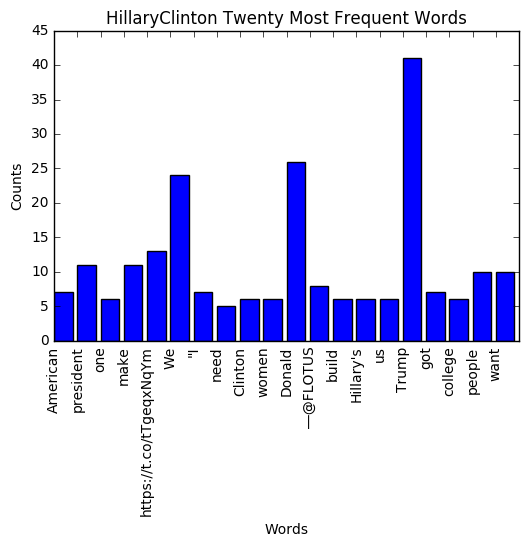

In [62]:
plt.bar(range(len(toptwentyHillaryClinton)), toptwentyHillaryClinton.values(), align='edge')
plt.xticks(range(len(toptwentyHillaryClinton)), toptwentyHillaryClinton.keys(), rotation=90)
plt.title('HillaryClinton Twenty Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Counts')

In [63]:
#counting words
from collections import Counter
counts = Counter(word_counts)
print(counts)

Counter({'Trump': 41, 'Donald': 26, 'We': 24, 'Hillary': 15, '—Hillary': 15, 'https://t.co/tTgeqxNqYm': 13, 'president': 11, 'make': 11, 'people': 10, 'want': 10, 'get': 10, '—@FLOTUS': 8, 'American': 7, 'got': 7, 'This': 7, '"I': 7, 'college': 6, 'us': 6, '&amp;': 6, "Hillary's": 6, 'women': 6, 'Clinton': 6, 'one': 6, 'build': 6, 'sure': 5, 'go': 5, 'great': 5, 'work': 5, 'sees': 5, 'gets': 5, 'The': 5, 'country': 5, 'need': 5, 'someone': 5, 'chance': 5, 'When': 5, 'take': 5, 'would': 5, 'It’s': 5, 'believe': 5, 'see': 5, 'years': 5, 'know': 5, 'much': 5, 'America': 5, 'It': 5, 'love': 4, 'looks': 4, 'without': 4, 'things': 4, 'everyone': 4, 'Americans': 4, 'next': 4, 'If': 4, 'hate.': 4, 'president.': 4, 'like': 4, 'vote': 4, 'it.': 4, 'Republican': 4, 'police': 4, 'every': 4, '-H': 4, 'economy': 4, "Let's": 4, 'better': 4, 'this.': 4, 'first': 4, 'election': 4, 'birther': 4, 'born': 4, 'inclusive': 3, 'plan': 3, 'real': 3, '"Hillary': 3, 'presidential': 3, 'never': 3, 'support': 3, 

In [65]:
a = Counter(filterHillaryClinton).most_common(20)
print (a)

[('Trump', 41), ('Donald', 26), ('We', 24), ('https://t.co/tTgeqxNqYm', 13), ('president', 11), ('make', 11), ('people', 10), ('want', 10), ('—@FLOTUS', 8), ('"I', 7), ('American', 7), ('got', 7), ('one', 6), ('build', 6), ('us', 6), ('college', 6), ('women', 6), ('Clinton', 6), ("Hillary's", 6), ('need', 5)]


In [66]:
from prettytable import PrettyTable
sorted(a)
pt = PrettyTable(field_names=['word', 'Frequency_HillaryClinton'])
[ pt.add_row(row) for row in sorted(a, reverse=True)[:20] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

+-------------------------+--------------------------+
| word                    | Frequency_HillaryClinton |
+-------------------------+--------------------------+
| —@FLOTUS                | 8                        |
| women                   | 6                        |
| want                    | 10                       |
| us                      | 6                        |
| president               | 11                       |
| people                  | 10                       |
| one                     | 6                        |
| need                    | 5                        |
| make                    | 11                       |
| https://t.co/tTgeqxNqYm | 13                       |
| got                     | 7                        |
| college                 | 6                        |
| build                   | 6                        |
| We                      | 24                       |
| Trump                   | 41                       |
| Hillary'

In [68]:
#Although labels for each word are not provided, x-axis values have been sorted so that the relationship between word frequencies is more apparent.
#Each axis has been adjusted to a logarithmic scale to "squash" the curve being displayed

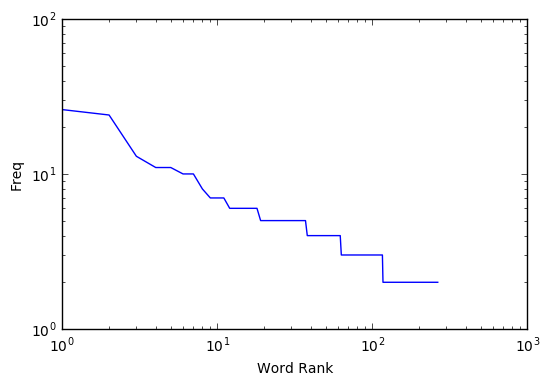

In [69]:
word_counts = sorted(Counter(filterHillaryClinton).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

[991, 630, 1390, 1213, 840, 826, 2218, 1190, 999, 9547, 3263, 3316, 3273, 6117, 1941, 2779, 2639, 3054, 3126, 5765, 590, 1119, 1357, 1948, 1271, 1773, 1139, 1114, 1182, 1203, 2577, 2212, 5308, 6298, 3244, 3772, 7847, 2635, 4727, 4537, 4188, 5267, 1408, 2214, 5960, 2378, 1631, 2922, 2321, 5100, 684, 1221, 2018, 1454, 1968, 3114, 2250, 6381, 3479, 6343, 2793, 4107, 1222, 12877, 15073, 1570, 7618, 1731, 1217, 980, 586, 2770, 1588, 4720, 871, 564, 1363, 731, 682, 561, 546, 517, 951, 712, 811, 605, 1334, 2398, 766, 1641, 995, 1614, 2644, 1676, 3545, 1836, 3217, 5835, 1671, 6089, 4053, 12172, 1234, 4087, 3173, 718, 5351, 2755, 3460, 4735, 3790, 1737, 6113, 2230, 1263, 922, 445, 669, 691, 614, 613, 832, 667, 657, 675, 874, 726, 1226, 1774, 3403, 1476, 1450, 9741, 1987, 3622, 6744, 869, 5106, 3914, 7353, 2089, 2551, 2190, 13519, 2582, 1887, 3518, 21847, 13456, 2181, 8968, 1973, 2821, 4025, 1264, 4668, 9935, 2791, 2984, 4171, 2705, 2403, 1947, 2230, 1156, 1384]


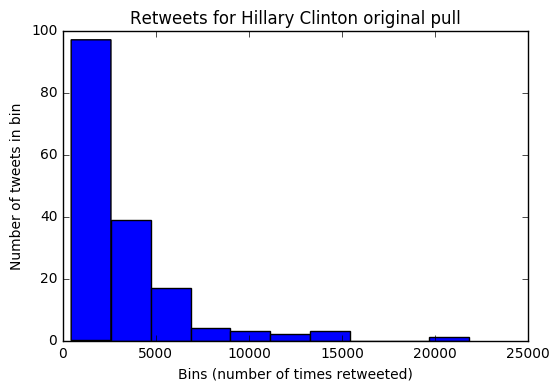

In [77]:
# Generating a histogram of retweet counts
#Using underscores while unpacking values in
# a tuple is idiomatic for discarding them
retweet = realHillaryClinton['retweet_count_x']

#print(retweet)
counts = [count for count in retweet]

plt.hist(counts)
plt.title("Retweets for Hillary Clinton original pull")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print (counts)

[991, 630, 1390, 1213, 840, 826, 2218, 1190, 999, 9547, 3263, 3316, 3273, 6117, 1941, 2779, 2639, 3054, 3126, 5765, 590, 1119, 1357, 1948, 1271, 1773, 1139, 1114, 1182, 1203, 2577, 2212, 5308, 6298, 3244, 3772, 7847, 2635, 4727, 4537, 4188, 5267, 1408, 2214, 5960, 2378, 1631, 2922, 2321, 5100, 684, 1221, 2018, 1454, 1968, 3114, 2250, 6381, 3479, 6343, 2793, 4107, 1222, 12877, 15073, 1570, 7619, 1731, 1217, 980, 586, 2770, 1588, 4720, 871, 564, 1363, 731, 682, 561, 546, 517, 951, 712, 811, 605, 1334, 2398, 766, 1641, 995, 1614, 2644, 1676, 3545, 1836, 3217, 5835, 1671, 6089, 4053, 12172, 1234, 4087, 3173, 718, 5351, 2755, 3461, 4735, 3790, 1737, 6113, 2230, 1263, 922, 445, 669, 691, 614, 613, 832, 667, 657, 675, 874, 726, 1226, 1774, 3403, 1476, 1450, 9741, 1987, 3622, 6745, 869, 5108, 3914, 7356, 2089, 2551, 2190, 13521, 2582, 1887, 3518, 21849, 13457, 2181, 8968, 1973, 2821, 4025, 1264, 4670, 9939, 2792, 2986, 4181, 2709, 2409, 1952, 2238, 1160, 1398]


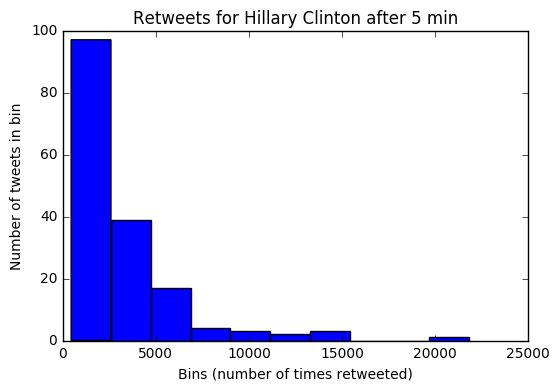

In [78]:
# Generating a histogram of retweet counts
#Using underscores while unpacking values in
# a tuple is idiomatic for discarding them
retweet = realHillaryClinton['retweet_count_y']

#print(retweet)
counts = [count for count in retweet]

plt.hist(counts)
plt.title("Retweets for Hillary Clinton after 5 min")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print (counts)

In [79]:
from nltk import FreqDist

freqdist = nltk.FreqDist(filterHillaryClinton)

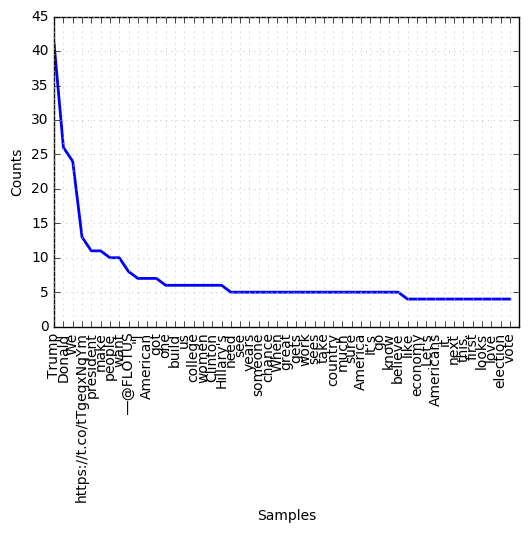

In [80]:
freqdist.plot(50)